<a href="https://colab.research.google.com/github/msiddalingaiah/MachineLearning/blob/master/Text/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Learned Embeddings

Embeddings are one way of representing words as vectors. Embeddings are simply a lookup table that maps a word index into a vector of a defined size.

There are many ways to compute embeddings. One-hot encoding is a simple approach, but that can produce large, sparse vectors that might be inefficient with a large vocabulary.

This notebook uses backpropagation to learn embeddings given a zero based array of contiguous identifiers.

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import Adam

## Define Parameters

The following cell defines the array of identifiers and embedding vector dimension.

In [0]:
identifiers = np.arange(0, 10000)

embedding_dimension = 50

## The Model

The model uses the built-in Keras Embedding layer. The weights in this layer represent the embedding vectors that will be computed or learned during training.

The model attempts to predict the identifier index, which is represented as a one-hot encoded vector. This is conveniently accomplished using sparse categorical cross entropy loss.

In [4]:
num_classes = len(identifiers)

model = Sequential()
model.add(Input(1,))
embedding_layer = Embedding(num_classes, embedding_dimension)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 50)             500000    
_________________________________________________________________
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10000)             510000    
Total params: 1,010,000
Trainable params: 1,010,000
Non-trainable params: 0
_________________________________________________________________


## Training

Training uses the identifer array as the input and expected output (labels).

In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

x_train = identifiers
y_train = identifiers

history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
79/79 [==============================] - 1s 8ms/step - loss: 9.2247 - accuracy: 0.0000e+00
Epoch 2/10
79/79 [==============================] - 1s 8ms/step - loss: 9.2015 - accuracy: 0.0052
Epoch 3/10
79/79 [==============================] - 1s 8ms/step - loss: 9.1842 - accuracy: 0.0613
Epoch 4/10
79/79 [==============================] - 1s 8ms/step - loss: 9.1583 - accuracy: 0.2660
Epoch 5/10
79/79 [==============================] - 1s 8ms/step - loss: 9.1198 - accuracy: 0.6315
Epoch 6/10
79/79 [==============================] - 1s 8ms/step - loss: 9.0658 - accuracy: 0.9469
Epoch 7/10
79/79 [==============================] - 1s 8ms/step - loss: 8.9943 - accuracy: 0.9946
Epoch 8/10
79/79 [==============================] - 1s 8ms/step - loss: 8.9039 - accuracy: 0.9967
Epoch 9/10
79/79 [==============================] - 1s 8ms/step - loss: 8.7945 - accuracy: 0.9971
Epoch 10/10
79/79 [==============================] - 1s 8ms/step - loss: 8.6664 - accuracy: 0.9971


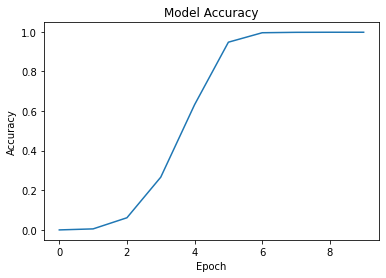

In [6]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Recover Embeddings

The embedding layer contains the weights. The Keras API has a method to get the weights from a layer.

In [7]:
embeddings = embedding_layer.get_weights()[0]
embeddings.shape

(10000, 50)

In [8]:
embeddings[0]

array([ 0.12051881, -0.11960231,  0.08720278, -0.13845262,  0.10052901,
       -0.1402186 ,  0.12157809,  0.09133673,  0.14235276,  0.09581891,
       -0.11776249,  0.1477621 ,  0.15034227, -0.1464887 , -0.15572743,
       -0.12142568, -0.15627952,  0.16235276, -0.1215926 ,  0.11625854,
       -0.13335098, -0.11659718,  0.12491196, -0.13097522,  0.12271889,
       -0.16938731,  0.09714976,  0.1529503 , -0.11771875,  0.12651329,
       -0.09267969, -0.11408915,  0.14726603, -0.1520277 , -0.12603039,
        0.1470017 , -0.14541188, -0.07187903,  0.11722022,  0.11857462,
       -0.13916233, -0.15620199,  0.16122474,  0.16482586,  0.16294566,
       -0.12067848,  0.14548655, -0.12691244,  0.12463727, -0.11698108],
      dtype=float32)

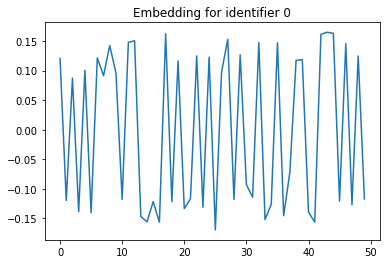

In [9]:
index = 0
plt.plot(embeddings[index])
plt.title(f'Embedding for identifier {index}')
plt.show()

## Verification

Ideally, embedding vectors should be orthogonal to each other. The following visualization plots cross correlation, which is the dot product of one vector with all others. It's not perfect, but reasonable.

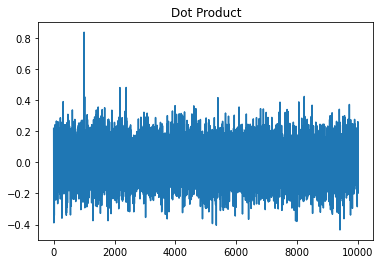

Standard deviation: 0.12


In [10]:
dots = []
for i in range(num_classes):
  dots.append(np.dot(embeddings[1000], embeddings[i]))

plt.plot(dots)
plt.title('Dot Product')
plt.show()

print(f'Standard deviation: {np.std(dots):.2f}')